Étude d'oscillations anharmoniques
==================================

**Date:** vendredi 18 février 2022



## Capacité numérique



-   à l’aide d’un langage de programmation, résoudre numériquement une
    équation différentielle du deuxième ordre nonlinéaire et faire
    apparaître l’effet des termes nonlinéaires.



## Modules



Au lieu d'utiliser la fonction `odeint`, on préférera la fonction
`solve_ivp` du même module offrant davantage de possibilités
([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)), en particulier celle de déterminer les instants où
certains évènements sont réalisés.



In [1]:
%matplotlib inline

La ligne précédente ne doit apparaître que dans les notebooks
`Jupyter`, pas dans un fichier python.



In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Période du pendule simple



### Équation différentielle adimensionnée



On étudie l'exemple du pendule simple dont l'angle $\theta$ est
solution de l'équation différentielle d'ordre 2:

\begin{equation*}
  \frac{\mathrm{d} \theta}{\mathrm{d} t} +  \omega_{0}^{2} \sin(\theta) = 0,
\end{equation*}

avec $\omega_0^2 = g/\ell$. En introduisant la période des
oscillations de faible amplitude $T_0 = 2\pi/\omega_0$, on définit
la variable sans dimension $\tau = t/T_0$ pour réécrire l'équation
sous la forme:

\begin{equation*}
  \frac{\mathrm{d}^2 \theta}{\mathrm{d} \tau^2} +  (2 \pi)^2 \sin(\theta) = 0,
\end{equation*}

On utilisera alors $\theta^\prime = \frac{\mathrm{d}
\theta}{\mathrm{d} \tau}$ comme «vitesse adimensionnée».



### Utilisation de `solve_ivp`



Comme avec `odeint`, on définit le système différentiel: attention,
ici le temps doit être le premier argument.



In [1]:
def systdiff(tau,y):
    theta,thetaprime = y
    # d theta/d t = thetaprime
    # d thetaprime / dt = - sin(theta)
    return [thetaprime, - (2*np.pi)**2*np.sin(theta)]

Les arguments nécessaires de `solve_ivp` sont:

-   la fonction `systdiff` comme avec `odeint`
-   l'intervalle de temps sur lequel intégrer (inutile ici de définir
    le tableau des instants utilisés)
-   les conditions initiales comme avec `odeint`

On va de plus utiliser ici l'argument `events` qui permet, au cours de
l'intégration, d'identifier certains évènements (caractérisés par la
nullité d'une fonction de l'instant `t` et de l'état `y` du système)
et d'y arrêter ou non le calcul (avec l'option `terminal`).

L'appel à `solve_ivp` retournera:

-   **`t`:** les instants utilisés (déterminés par l'algorithme)
-   **`y`:** les valeurs de la solution à ces instants
-   **`t_events`:** les approximations des instants de réalisations des évènements recherchés
-   **`y_events`:** les valeurs de la solution à ces instants



### Période du pendule simple



On utilise les passages par $\theta = 0$ avec $\dot{\theta >0}$
pour calculer la période des oscillations.



In [1]:
def passage_origine(tau,y):
    theta,thetaprime=y
    return theta
passage_origine.terminal = False #pour poursuivre l'intégration
passage_origine.direction = 1 #pour ne compter que les passages avec theta croissant

On précise les caractéristiques physiques du système.



In [1]:
longueur = .4 #m
g0 = 9.8 #m/s^2
omega0 = np.sqrt(g0/longueur) #rad/s
T0 = 2*np.pi/omega0

tau_min = 0
tau_max = 5 #périodes T0

theta0 = -np.pi/2 #angle initial (rad)
v0 =  0 #vitesse (m/s)
thetaprime0 = v0/(longueur*T0) # (rad)
CI = [theta0,thetaprime0]

On effectue la résolution numérique. On a forcé le pas d'intégration à
ne pas être trop grand avec l'option `max_step` car le choix par
défaut de l'algorithme crée des courbes qui paraissent
discontinues. On aurait également pu utiliser l'option `dense_output`
qui crée à partir de l'intégration une fonction continue en
l'interpolant par morceaux.



In [1]:
pendule = solve_ivp(systdiff,[tau_min,tau_max], CI,max_step= T0/50,events= passage_origine)
angles = pendule.y[0] #en rad
anglesDeg = angles*180/np.pi #en deg
instantsAdim = pendule.t #en unités de T0
instants = instantsAdim*T0 #en s
vitessesAngAdim = pendule.y[1] #en unités de 1/T0
vitesses = vitessesAngAdim*longueur/T0 #en m/s

On vérifie que le mouvement est périodique, car la durée séparant deux
évènements consécutifs est bien constante, mais que les oscillations
sont anharmoniques car elle est supérieure, pour $\theta_0 = \pi/2$
à sa valeur pour $\theta \ll 1$.



In [1]:
f'période pour theta0 = {theta0*180/np.pi} deg: {np.mean(np.diff(pendule.t_events[0]*T0))} s' #np.diff calcule la différence des termes consécutifs de la liste

# Out[171]:
'période pour theta0 = -90.0 deg: 1.498318470420248 s'

In [1]:
f'période des petits angle : {T0} s'

# Out[172]:
'période des petits angle : 1.2693951251881046 s'

On trace ensuite l'évolution temporelle et la trajectoire dans
l'espace des phases.



# Out[174]:

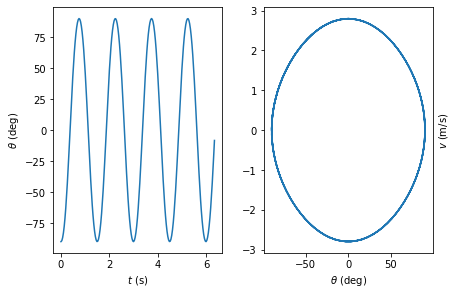

In [1]:
fig,(axtemp,axphase) = plt.subplots(1,2)
fig.tight_layout()
axtemp.plot(instants,anglesDeg)
axphase.plot(anglesDeg,vitesses)
axtemp.set_xlabel(r"$t$ (s)")
axtemp.set_ylabel(r"$\theta$ (deg)")
axphase.set_xlabel(r"$\theta$ (deg)")
axphase.set_ylabel(r"$v$ (m/s)")
axphase.yaxis.set_label_position("right")
fig.show()

## Questions du DM07



### 3a



### 3b



### 3c



### 3d

